# Lanjutan nomor 10

In [67]:
import pandas as pd

data_clean = pd.read_csv('Dataset/jobstreet_3000_hasillabeling.csv')
data_clean = pd.DataFrame(data_clean)

data_real = pd.read_csv('Dataset/jobstreet_all_hasiltextpreprocessing.csv')
data_real = pd.DataFrame(data_real)

A = data_clean['text_tokens_stemmed']
B = data_clean['Label']
C = data_real['text_tokens_stemmed']

In [68]:
len(data_real)

73981

In [69]:
data_clean = data_clean.drop(columns=['score', 'text_clean', 'text_Stopword', 'text_tokens'])
# data_clean.drop(columns='content')

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Handle missing values by filling them with an empty string

A = A.fillna('')
C = C.fillna('')

tfid_vectorizer = TfidfVectorizer()

A_fit_tfid = tfid_vectorizer.fit_transform(A)
A_tfid = tfid_vectorizer.transform(A)
C_tfid = tfid_vectorizer.transform(C)

In [71]:
print(A.shape)
print(A_tfid.shape)
print(C.shape)
print(C_tfid.shape)

(2753,)
(2753, 3937)
(73981,)
(73981, 3937)


In [72]:
A_tfid.toarray()
C_tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(A_tfid, B)

MultinomialNB()

In [74]:
C_pred = nb.predict(C_tfid)
data_real['Label NB'] = C_pred
data_real = pd.DataFrame(data_real)
data_real.to_csv('Dataset/jobstreet_all_hasil_sentimen_NB.csv', index=False)

data_real.head()

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif


In [75]:
dr = pd.read_csv('Dataset/jobstreet_all_hasil_sentimen_NB.csv')
dr = pd.DataFrame(dr)

In [76]:
dr

,userName,score,at,content,text_clean,text_Stopword,text_tokens,text_tokens_stemmed,Label NB
0,Pengguna Google,1,2024-12-12 08:14:23,"Setiap apply lamaran disini, bbrpa hari atau b...",setiap apply lamaran disini bbrpa hari atau bb...,apply lamaran bbrpa bbrpa minggu balasan stiap...,"['apply', 'lamaran', 'bbrpa', 'bbrpa', 'minggu...",apply lamar bbrpa bbrpa minggu balas stiap per...,negatif
1,Pengguna Google,3,2024-12-12 07:29:09,"min tolong ini ngebug, masa pas mau buka lowon...",min tolong ini ngebug masa pas mau buka lowong...,min tolong ngebug pas buka lowongan muter mute...,"['min', 'tolong', 'ngebug', 'pas', 'buka', 'lo...",min tolong ngebug pas buka lowong muter muter ...,negatif
2,Pengguna Google,2,2024-12-12 04:27:59,Worth it,worth it,worth it,"['worth', 'it']",worth it,negatif
3,Pengguna Google,1,2024-12-11 23:41:41,"Jadi susah re login by seek, gagal terus",jadi susah re login by seek gagal terus,susah re login by seek gagal,"['susah', 're', 'login', 'by', 'seek', 'gagal']",susah re login by seek gagal,negatif
4,Pengguna Google,1,2024-12-11 22:51:25,TOLONG DI PERBAIKI MASALAH YANG ADA DI APLIKAS...,tolong di perbaiki masalah yang ada di aplikas...,tolong perbaiki aplikasi login eror gausah sur...,"['tolong', 'perbaiki', 'aplikasi', 'login', 'e...",tolong baik aplikasi login eror gausah suruh s...,negatif
...,...,...,...,...,...,...,...,...,...
73976,Pengguna Google,4,2012-08-31 00:34:55,Good luck for us all....,good luck for us all,good luck for us all,"['good', 'luck', 'for', 'us', 'all']",good luck for us all,positif
73977,Pengguna Google,5,2012-07-30 14:56:50,Top,top,top,['top'],top,positif
73978,Pengguna Google,4,2012-04-06 09:09:14,Ok,ok,ok,['ok'],ok,positif
73979,Pengguna Google,5,2011-10-04 17:06:05,thanks for the job..,thanks for the job,thanks for the job,"['thanks', 'for', 'the', 'job']",thanks for the job,positif


In [77]:
# hitung label positif
positif = dr[dr['Label NB'] == "positif"]
print('Label Positif :', len(positif))

# hitung label negatif
negatif = dr[dr['Label NB'] == "negatif"]
print('Label Negatif :', len(negatif))

# totalkan
total = len(dr)
print('Total :', total)

Label Positif : 61946
Label Negatif : 12035
Total : 73981


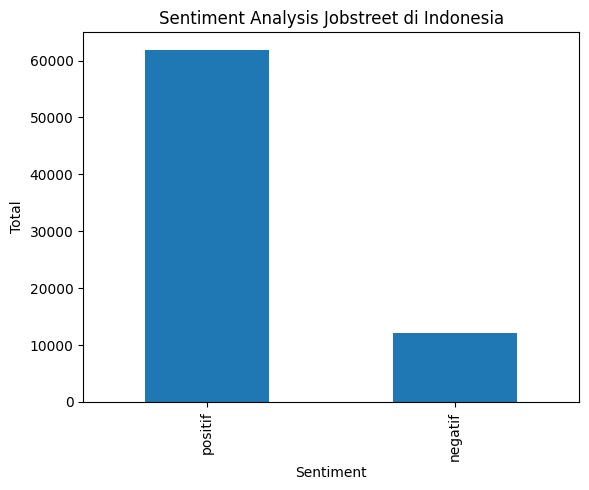

In [78]:
# buatlah line chart berdasarkan tanggal yang paling awal ke paling akhir
import matplotlib.pyplot as plt

dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

dr['date'] = dr['date'].dt.strftime('%Y-%m-%d')
dr['date'] = pd.to_datetime(dr['date'])

dr['Label NB'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Jobstreet di Indonesia')
plt.xlabel('Sentiment')
plt.ylabel('Total')
plt.show()


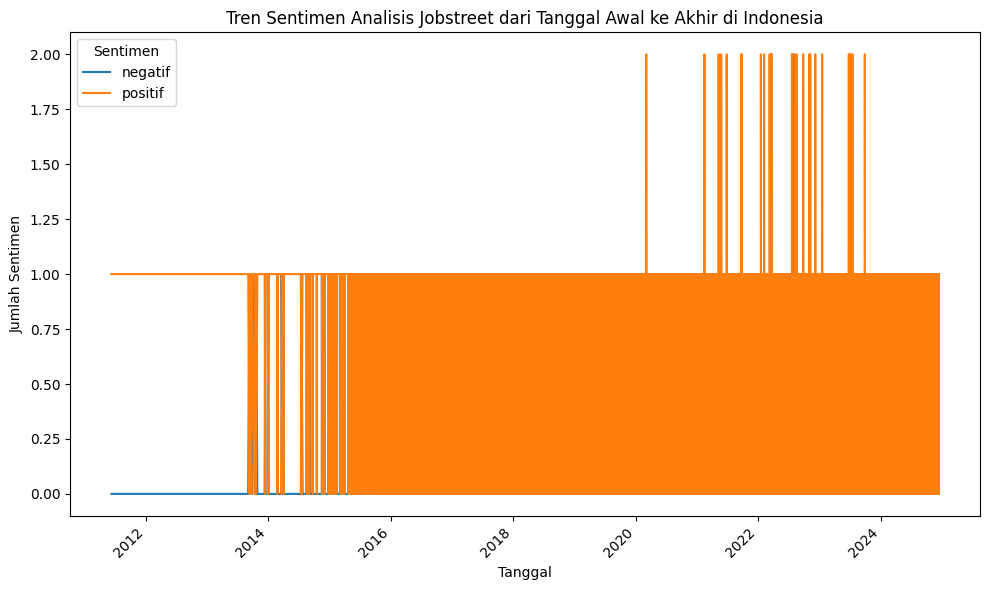

In [79]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Agregasi jumlah sentimen per tanggal
sentiment_per_day = dr.groupby(['date', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_day.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis Jobstreet dari Tanggal Awal ke Akhir di Indonesia')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()


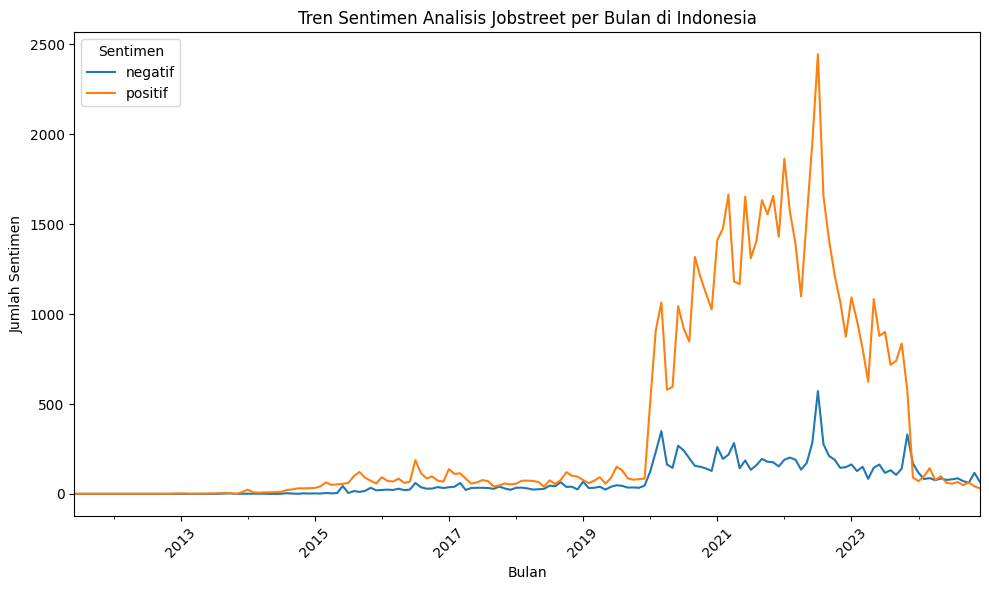

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# Konversi kolom 'at' ke datetime dan sort berdasarkan tanggal
dr['date'] = pd.to_datetime(dr['at'])
dr = dr.sort_values(by='date')

# Tambahkan kolom bulan (format YYYY-MM)
dr['month'] = dr['date'].dt.to_period('M')

# Agregasi jumlah sentimen per bulan
sentiment_per_month = dr.groupby(['month', 'Label NB']).size().unstack(fill_value=0)

# Plot Line Chart
sentiment_per_month.plot(kind='line', figsize=(10, 6))

# Tambahkan judul dan label sumbu
plt.title('Tren Sentimen Analisis Jobstreet per Bulan di Indonesia')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Sentimen')
plt.xticks(rotation=45)
plt.legend(title='Sentimen', loc='upper left')
plt.tight_layout()

# Tampilkan plot
plt.show()
